<a href="https://colab.research.google.com/github/vladluca96/Teme/blob/main/DNN_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U accelerate
!pip install -U transformers
!pip install -U deep-translator
!pip install -U datasets

!pip install spacy
!python -m spacy download ro_core_news_sm

!pip install stanza

!pip install -U keras_preprocessing
!pip install --upgrade tensorflow
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.33.0
    Uninstalling accelerate-0.33.0:
      Successfully uninstalled accelerate-0.33.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import os
import shutil
import datasets
import spacy
import stanza
import nltk
import keras
import logging
import optuna
import torch
import joblib

from joblib import dump, load
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from multiprocessing import Pool
from sklearn.neighbors import KNeighborsClassifier
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC, OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.models import Sequential
from numpy import array
from numpy import asarray
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
from spacy.lang.ro import Romanian
# from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from deep_translator import GoogleTranslator
from google.colab import files
from datasets import Dataset
from google.colab import files
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.layers import GlobalMaxPooling1D
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec

# from keras.preprocessing.text import Tokenizer
from keras.layers import TextVectorization
from keras.utils import text_dataset_from_directory
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

import optuna
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
import numpy as np

In [ ]:
from keras.utils import text_dataset_from_directory

In [ ]:
import optuna
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
import numpy as np
import time
import itertools

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
romanian_alphabet_regex = re.compile(r'[A-Za-zĂăÂâÎîȘșȚț]')

In [ ]:
!wget "https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data_splitted/laroseda_train.json"
f = open('laroseda_train.json')
# returns JSON object as
# a dictionary
train_data = json.load(f)

# Closing file
f.close()

--2024-09-10 09:46:24--  https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data_splitted/laroseda_train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4231664 (4.0M) [text/plain]
Saving to: ‘laroseda_train.json.1’

laroseda_train.json 100%[===================>]   4.04M  --.-KB/s    in 0.05s   

2024-09-10 09:46:24 (80.7 MB/s) - ‘laroseda_train.json.1’ saved [4231664/4231664]



In [ ]:
!wget "https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data_splitted/laroseda_test.json"
f = open('laroseda_test.json')
# returns JSON object as
# a dictionary
test_data = json.load(f)

# Closing file
f.close()


--2024-09-10 09:46:24--  https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data_splitted/laroseda_test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1025519 (1001K) [text/plain]
Saving to: ‘laroseda_test.json.1’

laroseda_test.json. 100%[===================>]   1001K  --.-KB/s    in 0.02s   

2024-09-10 09:46:25 (42.8 MB/s) - ‘laroseda_test.json.1’ saved [1025519/1025519]



In [ ]:
stanza.download('ro')
nlp = stanza.Pipeline('ro')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ro (Romanian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ro/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ro (Romanian):
| Processor | Package      |
----------------------------
| tokenize  | rrt          |
| pos       | rrt_nocharlm |
| lemma     | rrt_nocharlm |
| depparse  | rrt_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loa

In [ ]:
stop_words = set(stopwords.words('romanian'))
print(stop_words)

{'tocmai', 'totul', 'oriunde', 'nimic', 'vreo', 'al', 'câtva', 'cei', 'doi', 'tot', 'primul', 'cărei', 'niste', 'nişte', 'fiu', 'in', 'u', 'lângă', 'cărui', 'oricît', 'asupra', 'ei', 'aţi', 'pentru', 'fim', 'inapoi', 'aş', 'toata', 'intr', 'toate', 'căror', 'unele', 'sale', 'era', 'cel', 'noua', 'îl', 'ta', 'da', 'eu', 'multă', 'treilea', 'as', 'este', 'fie', 'cîţi', 'ălea', 'acest', 'nostru', 'patra', 'ul', 'altceva', 'cand', 'una', 'cît', 'a', 'atatia', 'oricare', 'sa-mi', 'm', 'unui', 'ea', 'ori', 'desi', 'dintr', 'aceea', 'fel', 'dă', 'isi', 'ce', 'careia', 'sunteţi', 'le', 'pina', 'ceea', 'două', 'are', 'spate', 'după', 'ăstea', 'cui', 'il', 'atitea', 'ceva', 'drept', 'li', 'doilea', 'puţin', 'ar', 'avut', 'vom', 'prima', 'printr-', 'prea', 'cam', 'prin', 'undeva', 'acestia', 'tuturor', 'acele', 'puţina', 'cîte', 'atata', 'catre', 'ăştia', 'eram', 'v', 'atatea', 'dintre', 'orice', 'vor', 'fost', 'vă', 'aceeasi', 'adica', 'se', 'la', 'intre', 'tăi', 'chiar', 'alte', 'trei', 'ati', 

In [ ]:
# vocab = Counter()
# vocab_pos = Counter()
# vocab_neg = Counter()
# vocab_pos_nlemm = Counter()
# vocab_neg_nlemm = Counter()

In [ ]:
# with open('vocab_neg.json', 'r') as file:
#     data = json.load(file)

# # Convert list to set
# vocab_neg = set(data)

# # Now, your_set contains the set of words from the file
# print(vocab_neg)

# with open('vocab_pos.json', 'r') as file:
#     data = json.load(file)

# # Convert list to set
# vocab_pos = set(data)

# # Now, your_set contains the set of words from the file
# print(vocab_pos)

In [ ]:
def read_vocab(file_path):
  read_vocab = set()

  with open(file_path, 'r') as file:
    for line_number, line in enumerate(file, start=1):
      # Split each line by spaces
      parts = line.strip().split()

      # Check if there are exactly two parts (word and count)
      if len(parts) == 2:
        # Create a tuple (word, count) and add it to the set
        word, count = parts[0], int(parts[1])

        # Create a tuple (word, count) and add it to the set
        read_vocab.add((word, count))
      else:
        # Print lines with unexpected structure
        print(f"Error in line {line_number}: {line}")
  return(Counter(dict(read_vocab)))


In [ ]:
def read_dset(file_path):
  with open(file_path, 'r') as file:
    data = json.load(file)
  return data

In [ ]:
# with open('vocab_pos.txt', 'r') as file:
#   read_vocab = {tuple(line.strip().split()) for line in file}

# # Now 'read_vocab' is a set of tuples
# print(read_vocab)
# dict(read_vocab)
# read_vocab_counter = Counter(dict(read_vocab))

# # Now 'read_vocab_counter' is a Counter type
# print(read_vocab_counter)

In [ ]:
# with open('vocab_neg.txt', 'r') as file:
#     for line_number, line in enumerate(file, start=1):
#         # Split each line by spaces
#         parts = line.strip().split()

#         # Check if there are exactly two parts (word and count)
#         if len(parts) == 2:
#             # Create a tuple (word, count) and add it to the set
#             read_vocab.add(tuple(parts))
#         else:
#             # Print lines with unexpected structure
#             print(f"Error in line {line_number}: {line}")


In [ ]:
def get_vocabs():
  # Define the file path
  file_path = 'vocab_pos.txt'
  vocab_pos=read_vocab(file_path)

  file_path = 'vocab_neg.txt'
  vocab_neg=read_vocab(file_path)

  file_path = 'vocab_pos_nlemm.txt'
  vocab_pos_nlemm=read_vocab(file_path)

  file_path = 'vocab_neg_nlemm.txt'
  vocab_neg_nlemm=read_vocab(file_path)

  file_path = 'vocab_clean.txt'
  clean_voc=read_vocab(file_path)

  print(len(vocab_pos))
  print(vocab_pos)

  print(len(vocab_neg))
  print(vocab_neg)

  print(len(vocab_pos_nlemm))
  print(vocab_pos_nlemm)

  print(len(vocab_neg_nlemm))
  print(vocab_neg_nlemm)

  print(len(clean_voc))
  print(clean_voc)

  return vocab_pos, vocab_neg, vocab_pos_nlemm, vocab_neg_nlemm, clean_voc

In [ ]:
# for word in set(stopwords.words('romanian')):
#   if (word in vocab_pos_nlemm and word not in vocab_pos) or (word in vocab_neg_nlemm and word not in vocab_neg):
#     lem=nlp(word)
#     lem=lem.sentences[0]
#     lem=lem.words[0]
#     lem=lem.lemma
#     print(word+' '+ lem)

In [ ]:
def filter_alphabetic_tokens(tokens):
    # Define the Romanian alphabet range
    romanian_alphabet = "aăâbcddeefghiîjklmnopqrsștțuvwxyźâăîşţ"

    # Build the regex pattern for filtering
    pattern = re.compile(f"[^{romanian_alphabet}]")

    # Filter out tokens that contain non-alphabetic characters
    filtered_tokens = [token for token in tokens if not pattern.search(token)]

    return filtered_tokens

In [ ]:
def clean_line_neg(line):
  rev=line['title']+' . '+ line['content']
  # rev=i['content']
  rev = rev.lower()
  rev = re.sub(r'[.,!?()"\'/:;/\\\-]', ' ', rev)
  rev = re.sub(r'\s+', ' ', rev)
  words=rev.split()
  words = filter_alphabetic_tokens(words)
  vocab_neg_nlemm.update(words)
  rev= ' '.join(words)
  doc = nlp(rev)
  lemmatized_tokens = [word.lemma for sent in doc.sentences for word in sent.words]
  lemmatized_tokens=[token for token in lemmatized_tokens if isinstance(token, str)]
  lemmatized_tokens=[token for token in lemmatized_tokens if not token.isnumeric()]
  lemmatized_tokens=[token for token in lemmatized_tokens if not any(char.isdigit() for char in token)]
  vocab_neg.update(lemmatized_tokens)
  rev=' '.join(lemmatized_tokens)
  return rev

In [ ]:
def clean_line_pos(line):
  rev=line['title']+' . '+ line['content']
  rev = rev.lower()
  rev = re.sub(r'[.,!?()"\'/:;/\\\-]', ' ', rev)
  rev = re.sub(r'\s+', ' ', rev)
  words=rev.split()
  words = filter_alphabetic_tokens(words)
  vocab_pos_nlemm.update(words)
  rev= ' '.join(words)
  doc = nlp(rev)
  lemmatized_tokens = [word.lemma for sent in doc.sentences for word in sent.words]
  lemmatized_tokens=[token for token in lemmatized_tokens if isinstance(token, str)]
  lemmatized_tokens=[token for token in lemmatized_tokens if not token.isnumeric()]
  lemmatized_tokens=[token for token in lemmatized_tokens if not any(char.isdigit() for char in token)]
  vocab_pos.update(lemmatized_tokens)
  rev=' '.join(lemmatized_tokens)
  return rev

In [ ]:
# clean_voc=Counter()

In [ ]:
def clean_line(line):
  rev=line['title']+' . '+ line['content']
  rev = rev.lower()
  rev = re.sub(r'[.,!?()"\'/:;/\\\-]', ' ', rev)
  rev = re.sub(r'\s+', ' ', rev)
  words=rev.split()
  words = filter_alphabetic_tokens(words)
  rev=' '.join(words)
  doc = nlp(rev)
  lemmatized_tokens = [word.lemma for sent in doc.sentences for word in sent.words]
  lemmatized_tokens=[token for token in lemmatized_tokens if isinstance(token, str)]
  lemmatized_tokens=[token for token in lemmatized_tokens if not token.isnumeric()]
  lemmatized_tokens=[token for token in lemmatized_tokens if not any(char.isdigit() for char in token)]
  clean_voc.update(lemmatized_tokens)
  rev=' '.join(lemmatized_tokens)
  return rev

In [ ]:
def read_train():
  train_pos=list()
  train_neg=list()
  train_star3=list()
  for i in train_data['reviews']:
    # print(i)
    match i['starRating']:
      case '1':
        train_neg.append(i)
      case '2':
        train_neg.append(i)
      case '3':
        train_star3.append(i)
      case '4':
        train_pos.append(i)
      case '5':
        train_pos.append(i)

  train_pos_clean=list()
  for i in train_pos:
    # print(i)
    rev=clean_line(i)
    train_pos_clean.append(rev)

  train_neg_clean=list()
  for i in train_neg:
    rev=clean_line(i)
    train_neg_clean.append(rev)


In [ ]:
# file_path = 'vocab_clean.txt'

def write_vocab(file_path,vocab):
  # Write each tuple to the file
  with open(file_path, 'w') as file:
      for word, count in vocab.items():
          file.write(f'{word} {count}\n')
def write_dset(file_path,dset):
  with open(file_path, 'w') as file:
    json.dump(list(dset), file)

In [ ]:
def read_test():
  test_pos=list()
  test_neg=list()
  test_star3=list()
  for i in test_data['reviews']:
    # print(i)
    match i['starRating']:
      case '1':
        test_neg.append(i)
      case '2':
        test_neg.append(i)
      case '3':
        test_star3.append(i)
      case '4':
        test_pos.append(i)
      case '5':
        test_pos.append(i)

  test_pos_clean=list()
  for i in test_pos:
    rev=clean_line(i)
    test_pos_clean.append(rev)

  test_neg_clean=list()
  for i in test_neg:
    rev=clean_line(i)
    test_neg_clean.append(rev)


In [ ]:
def write_dsets():
  write_dset('train_neg.json',train_neg_clean)
  write_dset('test_neg.json',test_neg_clean)
  write_dset('train_pos.json',train_pos_clean)
  write_dset('test_pos.json',test_pos_clean)

In [ ]:
def get_dsets():
  file_path = 'train_pos.json'
  train_pos_clean=read_dset(file_path)

  file_path = 'train_neg.json'
  train_neg_clean=read_dset(file_path)

  file_path = 'test_pos.json'
  test_pos_clean=read_dset(file_path)

  file_path = 'test_neg.json'
  test_neg_clean=read_dset(file_path)

  print(len(train_pos_clean))
  print(train_pos_clean)

  print(len(train_neg_clean))
  print(train_neg_clean)

  print(len(test_pos_clean))
  print(test_pos_clean)

  print(len(test_neg_clean))
  print(test_neg_clean)

  return train_pos_clean, train_neg_clean, test_pos_clean, test_neg_clean

In [ ]:
vocab_pos, vocab_neg, vocab_pos_nlemm, vocab_neg_nlemm, clean_voc = get_vocabs()
train_pos_clean, train_neg_clean, test_pos_clean, test_neg_clean =get_dsets()

Error in line 340: daca android 1

Error in line 1470: folosesc oricum 1

Error in line 2477: si bine 1

Error in line 3325: cu bt 1

Error in line 4501: cel mai 1

Error in line 4802: mici melodii 1

Error in line 5351: decat la 1

Error in line 5541: lei este 1

Error in line 5921: pot spune 1

Error in line 7206: glitch uri 1

Error in line 7278: pana la 1

Error in line 7349: mai portabile 1

Error in line 1184: ar mai 1

Error in line 2984: sony si 1

Error in line 5233: balansat spre 1

Error in line 5597: fir si 1

Error in line 5667: e cumparat 1

Error in line 5813: fara motiv 1

Error in line 5862: aprins in 1

Error in line 6099: returnata ca 1

Error in line 6449: mai luminoase 1

Error in line 7612: emag excelente 1

Error in line 8194: charge undeva 1

Error in line 8698: in decembrie 1

Error in line 340: daca android 1

Error in line 1470: folosesc oricum 1

Error in line 2477: si bine 1

Error in line 3325: cu bt 1

Error in line 4501: cel mai 1

Error in line 4802: mi

In [ ]:
def write_vocabs():
  file_path = 'vocab_neg.txt'

  # Write each tuple to the file
  with open(file_path, 'w') as file:
      for word, count in vocab_neg.items():
          file.write(f'{word} {count}\n')

  file_path = 'vocab_pos.txt'

  # Write each tuple to the file
  with open(file_path, 'w') as file:
      for word, count in vocab_pos.items():
          file.write(f'{word} {count}\n')

  file_path = 'vocab_neg_nlemm.txt'

  # Write each tuple to the file
  with open(file_path, 'w') as file:
      for word, count in vocab_neg_nlemm.items():
          file.write(f'{word} {count}\n')

  file_path = 'vocab_pos_nlemm.txt'

  # Write each tuple to the file
  with open(file_path, 'w') as file:
      for word, count in vocab_pos_nlemm.items():
          file.write(f'{word} {count}\n')

In [ ]:
# files.download('vocab_pos.txt')
# files.download('vocab_neg.txt')
# files.download('vocab_pos_nlemm.txt')
# files.download('vocab_neg_nlemm.txt')

In [ ]:
print(vocab_pos.most_common(50))
print(vocab_neg.most_common(50))

[('de', 8896), ('fi', 7161), ('avea', 6449), ('si', 6003), ('un', 5397), ('foarte', 4528), ('la', 4158), ('nu', 3273), ('sine', 3245), ('el', 3073), ('bun', 2980), ('in', 2916), ('cu', 2821), ('ca', 2452), ('excelent', 2403), ('recomanda', 2252), ('său', 2244), ('mai', 2202), ('pe', 2076), ('pentru', 1865), ('eu', 1567), ('care', 1380), ('bine', 1377), ('telefon', 1363), ('calitate', 1348), ('pret', 1293), ('baterie', 1231), ('dar', 1219), ('produs', 1187), ('mult', 1108), ('putea', 1106), ('incarca', 1061), ('ok', 1042), ('multumi', 1028), ('din', 1013), ('tu', 975), ('multumit', 956), ('face', 891), ('ce', 870), ('boxă', 833), ('folosi', 812), ('tot', 810), ('sunet', 805), ('acesta', 794), ('super', 762), ('auzi', 741), ('merita', 695), ('al', 668), ('meu', 640), ('acela', 623)]
[('nu', 11959), ('avea', 11118), ('de', 10135), ('fi', 7847), ('si', 6547), ('un', 6000), ('la', 5222), ('in', 4383), ('sine', 4376), ('el', 4351), ('său', 4129), ('ca', 3758), ('mai', 3446), ('recomanda', 32

In [ ]:
print(len(vocab_pos))
print(len(vocab_neg))
print(len(vocab_pos_nlemm))
print(len(vocab_neg_nlemm))
print(len(clean_voc))
# print(vocab_neg.shape())

7601
8722
10331
11901
11870


In [ ]:
vvoc=clean_voc

In [ ]:
dict_pos = dict(vocab_pos)
dict_neg = dict(vocab_neg)

# Merge dictionaries and handle occurrences
merged_dict = {}
for word in set(dict_pos.keys()).union(dict_neg.keys()):
    occurrences_pos = dict_pos.get(word, 0)
    occurrences_neg = dict_neg.get(word, 0)
    merged_dict[word] = (occurrences_pos, occurrences_neg)


# Order the merged dictionary by maximum occurrence
sorted_merged_dict = dict(sorted(merged_dict.items(), key=lambda item: sum(item[1]), reverse=True))

# Display the ordered occurrences
# for word, counts in sorted_merged_dict.items():
#     print(f'{word}: {counts[0]} (positive), {counts[1]} (negative), Max Occurrence: {sum(counts)}')

# # Display the merged occurrences
# for word, counts in merged_dict.items():
#     print(f'{word}: {counts[0]} (positive), {counts[1]} (negative)')



In [ ]:
percentage_difference = {
    word: ((counts[0] - counts[1]) / ((counts[0] + counts[1]) / 2)) * 100
    for word, counts in sorted_merged_dict.items()
}

# Display the first 50 items in the sorted merged dictionary with percentage difference
for i, (word, counts) in enumerate(sorted_merged_dict.items()):
    if i < 50:
        diff_percentage = percentage_difference[word]
        # print(f'{word}: {counts[0]} (positive), {counts[1]} (negative), Percentage Difference: {diff_percentage:.2f}%')
    else:
        break

In [ ]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [ ]:
def load_vocs():
  vocab_filename = 'vocab_pos.txt'
  vocab_pos = load_doc(vocab_filename)
  # vocab = tokens
  vocab_pos = vocab_pos.split()
  vocab_pos = set(vocab_pos)

  vocab_filename = 'vocab_neg.txt'
  vocab_neg = load_doc(vocab_filename)
  # vocab = tokens
  vocab_neg = vocab_neg.split()
  vocab_neg = set(vocab_neg)

In [ ]:
def remove_vocab(sett,rvocab):
  nset=list()
  for doc in sett:
    tokens = doc.split()
    tokens = [w for w in tokens if w not in rvocab]
    tokens = ' '.join(tokens)
    nset.append(tokens)
  return nset

In [ ]:
def remove_vocab_one(doc,rvocab):
  tokens = doc.split()
  tokens = [w for w in tokens if w not in rvocab]
  tokens = ' '.join(tokens)
  return tokens

In [ ]:
# train_neg_clean=remove_vocab(train_neg_clean)
# train_pos_clean=remove_vocab(train_pos_clean)
# test_neg_clean=remove_vocab(test_neg_clean)
# test_pos_clean=remove_vocab(test_pos_clean)

In [ ]:
def rem_words(perc):
  c=0

  wordds=[]

  for word in stop_words:
    lem=nlp(word)
    lem=lem.sentences[0]
    lem=lem.words[0]
    lem=lem.lemma
    if lem in sorted_merged_dict :
      if abs(percentage_difference[lem])>perc and sum(sorted_merged_dict[lem])>2:
        # print(lem+' '+word+ ' '+str(percentage_difference[lem]))
        c+=1;
        wordds.append(word)

  print(c)
  # print(wordds)
  return wordds

In [ ]:
print(abs(percentage_difference['nu']))

114.04936974789916


In [ ]:
# tokens= [k for k,c in clean_voc.items() if c > 2]
# print(len(tokens))

In [ ]:
def train_prep(test_train_neg_clean,test_train_pos_clean):
  train_feat = np.array(test_train_neg_clean+test_train_pos_clean)
  train_lab = np.array([0 for _ in range(6000)] + [1 for _ in range(6000)])

  train = pd.DataFrame([train_feat, train_lab]).T
  train.columns = ['data', 'label']
  # train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
  return train

In [ ]:
def test_prep(test_test_neg_clean,test_test_pos_clean):
  test_feat = np.array(test_test_neg_clean+test_test_pos_clean)
  test_lab = np.array([0 for _ in range(1500)] + [1 for _ in range(1500)])

  test = pd.DataFrame([test_feat, test_lab]).T
  test.columns = ['data', 'label']
  # train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
  return test

In [ ]:
print(len(stop_words))

356


In [ ]:
# print(len(clean_voc))
# min_occurane = 2
# # tokens = [k for k,c in clean_voc.items() if c >= min_occurane]
# print(len(tokens))


# tokens= [k for k,c in clean_voc.items() if c < 3]
# # print(tokens)
# # acc=[]
#   # for n in range(10):
#   # print("run--"+str(n*10))
# to_remove=tokens+rem_words(5*10)

# final_voc=[word for word in clean_voc if word not in to_remove]
# print(len(final_voc))

# # data = '\n'.join(tokens)
# # # open file
# # file = open('clean_voc.txt', 'w')
# # # write text
# # file.write(data)
# # # close file
# # file.close()

In [ ]:
tokenizer = Tokenizer()

In [ ]:
w2v_model = Word2Vec.load("word2vec_model.bin")

In [ ]:

def evaluate(history,x_test):
  # Plot training and validation curves
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  # Predict probabilities for each class
  y_pred_prob = model.predict(x_test)

  # Threshold probabilities to get predicted classes
  y_pred = (y_pred_prob > 0.5).astype(int)  # Assuming binary classification with a threshold of 0.5

  # Confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)

  # Classification report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  # ROC curve and AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# brek it don no

excelent foarte bun incarca un de oară pană muri


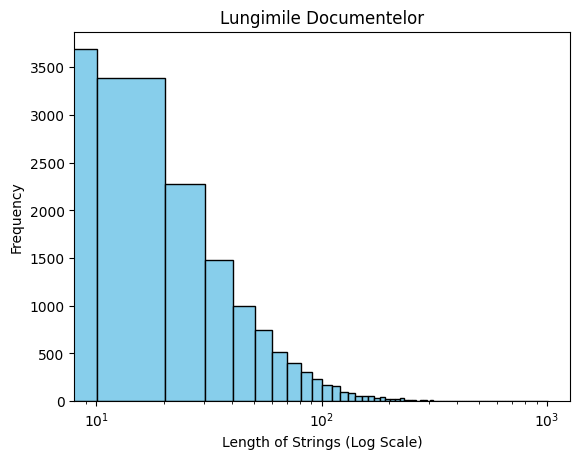

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_length_distribution(data):
    # Calculate the lengths of each string in the list
    lengths = [len(item.split()) for item in data]

    # Create a histogram of the lengths
    plt.hist(lengths, bins=100, color='skyblue', edgecolor='black')

    # Set the x-axis to a logarithmic scale
    plt.xscale('log')

    # Add labels and title
    plt.xlabel('Length of Strings (Log Scale)')
    plt.ylabel('Frequency')
    plt.title('Lungimile Documentelor')

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'data' is your list of strings
data = train_pos_clean + train_neg_clean + test_pos_clean + test_neg_clean
print(data[10])
plot_length_distribution(data)


In [ ]:
y_train = array([0 for _ in range(6000)] + [1 for _ in range(6000)])
y_test = array([0 for _ in range(1500)] + [1 for _ in range(1500)])


tokens= [k for k,c in clean_voc.items() if c < 3]
# print(tokens)
# acc=[]
  # for n in range(10):
  # print("run--"+str(n*10))
to_remove=tokens+rem_words(5*10)

test_train_neg_clean=remove_vocab(train_neg_clean,to_remove)
test_train_pos_clean=remove_vocab(train_pos_clean,to_remove)
test_test_neg_clean=remove_vocab(test_neg_clean,to_remove)
test_test_pos_clean=remove_vocab(test_pos_clean,to_remove)
print(" cleaned")
train=test_train_neg_clean + test_train_pos_clean
test=test_test_neg_clean + test_test_pos_clean

106
 cleaned


In [ ]:
# 'nu' in rem_words(0*10)

# # print(rem_words(0*10))
# # print(rem_words(1*10))
# print(rem_words(5*10))
# # print(rem_words(10*10))

297
106
['tocmai', 'oriunde', 'nimic', 'doi', 'primul', 'niste', 'fiu', 'asupra', 'inapoi', 'intr', 'sale', 'noua', 'ta', 'da', 'treilea', 'as', 'altceva', 'cand', 'atatia', 'ori', 'desi', 'dă', 'două', 'are', 'spate', 'după', 'ceva', 'doilea', 'avut', 'prima', 'prea', 'acele', 'atata', 'catre', 'dintre', 'aceeasi', 'intre', 'tăi', 'trei', 'ati', 'vostru', 't', 'numai', 'acea', 'aibă', 'sa', 'nimeni', 'asa', 'nici', 'tale', 'dau', 'sa-ti', 'ai', 'voastre', 'pic', 'voştri', 'alta', 'săi', 'dată', 'poate', 'foarte', 'altul', 'treia', 'ba', 'cumva', 'citeva', 'oricine', 'cineva', 'unu', 'multi', 'sus', 'deja', 'avea', 'dupa', 'doar', 'nu', 'pai', 'decit', 'ceilalti', 'atit', 'acei', 'avem', 'nou', 'acel', 'deci', 'cum', 'atare', 'dat', 'parca', 'nouă', 'iar', 'aveţi', 'ci', 'altcineva', 'său', 'voastră', 'cind', 'abia', 'acelasi', 'sub', 'fara', 'ala', 'am', 'apoi', 'din', 'deasupra']


In [ ]:
print(len(to_remove))

7357


In [ ]:
word2vec_model = Word2Vec.load('word2vec_model.bin')
def filter_words(review):
  return [word for word in review.split() if word in w2v_model.wv]

In [ ]:
vocab_size = len(word2vec_model.wv)
embedding_dim = word2vec_model.vector_size

train_docs = [filter_words(review) for review in train]
test_docs = [filter_words(review) for review in test]

embedded_reviews = [[w2v_model.wv[word] for word in review] for review in train_docs]
xtrain = pad_sequences(embedded_reviews, maxlen=200, padding='post', truncating='post').astype('float32')

embedded_reviews = [[w2v_model.wv[word] for word in review] for review in test_docs]
xtest = pad_sequences(embedded_reviews, maxlen=200, padding='post', truncating='post').astype('float32')


-------------------------

In [ ]:
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv:
            feature_vector = np.add(feature_vector, model.wv[word])
            n_words += 1
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Convert each document or sentence into an averaged word vector
def document_vectorizer(docs, model, num_features):
    doc_vectors = [average_word_vectors(doc, model, num_features) for doc in docs]
    return np.array(doc_vectors)


In [ ]:
def shuffle(test_train_neg_clean , test_train_pos_clean , test_test_neg_clean , test_test_pos_clean):
  pos = test_train_pos_clean + test_test_pos_clean
  neg = test_train_neg_clean + test_test_neg_clean

  all_texts = pos + neg
  labels = [1] * len(pos) + [0] * len(neg)  # 1 for positive, 0 for negative

  # Split the data into training and testing sets
  train_texts, test_texts, train_labels, test_labels = train_test_split ( all_texts, labels, test_size=0.2, random_state=42)

  return train_texts, test_texts


In [ ]:
def average_document_vectors(docs,dim):
    averaged_docs = []

    for doc in docs:
        # print(doc.shape)
        # doc.tolist()
        # print(len(doc))
        # print(len(doc[0]))
        if doc:  # Check if the document is not empty
            averaged_vector = np.mean(doc, axis=dim)
            averaged_docs.append(averaged_vector)
        else:
            # Handle empty documents (e.g., by skipping or providing default values)
            averaged_docs.append(np.zeros((word2vec_model.vector_size), dtype=np.float32))  # Example: Use zero vector for empty document
    return np.array(averaged_docs)

In [ ]:
def average_all_word_vectors(X_w2v,dim):
  # X_w2v shape: (15000, 200, 300)
  # We want to take the average across the last axis (300) to reduce it to (15000, 200)
  X_avg = np.mean(X_w2v, axis=dim)  # Average along the last dimension
  return X_avg

In [ ]:
opt_set = test_train_neg_clean + test_test_neg_clean + test_test_pos_clean + test_train_pos_clean

y_opt = np.array([0 for _ in range(7500)] + [1 for _ in range(7500)])

vectorizer = CountVectorizer()
X_opt = vectorizer.fit_transform(opt_set)

In [ ]:
print(vectorizer.vocabulary)

None


In [ ]:
results_list=[]

import optuna
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score

train_docs = [filter_words(review) for review in opt_set]

X_opt_w2v = [[w2v_model.wv[word] for word in review] for review in train_docs]
# X_train = pad_sequences(embedded_reviews, maxlen=200, padding='post', truncating='post').astype('float32')

# X_opt_w2v = pad_sequences(X_opt_w2v, maxlen=200, padding='post')

# X_opt_w2v.tolist()
X_opt_w2v_a = average_document_vectors(X_opt_w2v,0)

X_opt_w2v_p = pad_sequences(X_opt_w2v, maxlen=50, padding='post', truncating='post').astype('float32')

# X_opt_w2v_a = average_all_word_vectors(X_opt_w2v,1)

print(len(X_opt_w2v))
print(len(X_opt_w2v[0]))
print(len(X_opt_w2v[0][0]))

print(X_opt_w2v_a.shape)
print(X_opt_w2v_p.shape)

15000
12
300
(15000, 300)
(15000, 50, 300)


In [ ]:


# Training and saving the model with DM
def train_and_save_dm_model(tagged_data, model_path):
    model_dm = Doc2Vec(vector_size=300, window=5, min_count=2, workers=4, epochs=20, dm=1)
    model_dm.build_vocab(tagged_data)
    model_dm.train(tagged_data, total_examples=model_dm.corpus_count, epochs=model_dm.epochs)
    model_dm.save(model_path)
    print(f"Doc2Vec DM model saved to {model_path}")

# Training and saving the model with DBOW
def train_and_save_dbow_model(tagged_data, model_path):
    model_dbow = Doc2Vec(vector_size=300, window=5, min_count=2, workers=4, epochs=20, dm=0)
    model_dbow.build_vocab(tagged_data)
    model_dbow.train(tagged_data, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)
    model_dbow.save(model_path)
    print(f"Doc2Vec DBOW model saved to {model_path}")



# Prepare tagged documents
tagged_data = [TaggedDocument(words=text.split(), tags=[f'DOC_{i}']) for i, text in enumerate(train+test)]
# Example usage
train_and_save_dm_model(tagged_data, 'doc2vec_dm.model')
train_and_save_dbow_model(tagged_data, 'doc2vec_dbow.model')

Doc2Vec DM model saved to doc2vec_dm.model
Doc2Vec DBOW model saved to doc2vec_dbow.model


In [ ]:
d2v_model_dm = Doc2Vec.load('doc2vec_dm.model')
print("Doc2Vec DM model loaded successfully.")

# Load the Doc2Vec DBOW model
d2v_model_dbow = Doc2Vec.load('doc2vec_dbow.model')
print("Doc2Vec DBOW model loaded successfully.")

Doc2Vec DM model loaded successfully.
Doc2Vec DBOW model loaded successfully.


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_opt_tfidf = tfidf_vectorizer.fit_transform(opt_set)

X_opt_tfidf = X_opt_tfidf.toarray()

tagged_docs = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(opt_set)]

X_opt_dm = np.array([d2v_model_dm.infer_vector(doc.words) for doc in tagged_docs])
X_opt_dbow = np.array([d2v_model_dbow.infer_vector(doc.words) for doc in tagged_docs])


In [ ]:
vectorizer = CountVectorizer()

    # Fit the vectorizer on the documents to get the vocabulary
vectorizer.fit(opt_set)

    # Get the vocabulary
final_vocab = vectorizer.vocabulary_

In [ ]:
def pos_vec(X_train,X_test):
  if np.any(X_train < 0) or np.any(X_test < 0):
    offset = np.abs(np.min(X_train)) + 1
    X_train_pos = X_train + offset
    X_test_pos = X_test + offset
  else:
    X_train_pos = X_train
    X_test_pos = X_test
  return X_train_pos, X_test_pos

In [ ]:
def get_log_filename(base_name='experiment_log', ext='log'):
    counter = 1
    while True:
        filename = f"{base_name}_{counter}.{ext}"
        if not os.path.exists(filename):
            return filename
        counter += 1

In [ ]:

# # Create a logger object
# logger = logging.getLogger('experiment_logger')
# logger.setLevel(logging.INFO)

# # Create a file handler for logging
# file_handler = logging.FileHandler('model_results.log')
# file_handler.setLevel(logging.INFO)

# # Create a logging format
# formatter = logging.Formatter('%(asctime)s - %(message)s')
# file_handler.setFormatter(formatter)

# # Add the handler to the logger
# logger.addHandler(file_handler)

# Function to run a single experiment and log the results
def run_single_experiment(call):
    feat, dim, model = call[0], call[1], call[2]
    accuracy=[]

    # Log the start of the experiment
    logger.info(f"Starting: feat={feat}, dim={dim}, model={model}")

    # Run the experiment
    try:
        accuracy = run_cml(*call)
        logger.info(f"Finished: feat={feat}, dim={dim}, model={model} with accuracy={accuracy}")
    except Exception as e:
        logger.error(f"Error with feat={feat}, dim={dim}, model={model}: {e}")

    return accuracy


In [ ]:
print(X_opt[5])

  (0, 1986)	1
  (0, 1255)	1
  (0, 4342)	1
  (0, 1343)	1
  (0, 5564)	1
  (0, 5314)	1
  (0, 4452)	1
  (0, 2079)	1
  (0, 4926)	1
  (0, 1555)	1
  (0, 2836)	1
  (0, 3194)	1


In [ ]:
opt_set = test_train_neg_clean + test_test_neg_clean + test_test_pos_clean + test_train_pos_clean

y_opt = np.array([0 for _ in range(7500)] + [1 for _ in range(7500)])

vectorizer = CountVectorizer()
X_opt = vectorizer.fit_transform(opt_set)
# X_opt=X_opt.toarray()

In [ ]:
def run_cml(feat,dim,mod):#,test_train_neg_clean , test_train_pos_clean , test_test_neg_clean , test_test_pos_clean):
  print("run:", feat, ' ', dim ,' ',mod)
  start_time = time.time()

  for n in range(1):
    match feat:
      case "bow":
        X_train, X_test, y_train, y_test = train_test_split(X_opt, y_opt, test_size=0.2, random_state=42)
        nn=0
      case "tfidf":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_tfidf, y_opt, test_size=0.2, random_state=42)
        nn=1
      case "w2v":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_w2v_a, y_opt, test_size=0.2, random_state=42)
        nn=0
      case "d2v_dm":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_dm, y_opt, test_size=0.2, random_state=42)
        nn=1
      case "d2v_dbow":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_dbow, y_opt, test_size=0.2, random_state=42)
        nn=4

    if not isinstance(X_train, np.ndarray):
        X_train.toarray()
    if not isinstance(X_test, np.ndarray):
        X_test.toarray()

    if feat=="bow" or feat=="tfidf":
      comp=500
    else:
      comp=100
    match dim:
      case "pca":
        pca = PCA(n_components=comp)  # Adjust n_components as needed

        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

      case "nmf":
        # X_train, X_test = pos_vec(X_train,X_test)

        # nmf = NMF(n_components=comp, random_state=42)

        # X_train = nmf.fit_transform(X_train)
        # X_test = nmf.transform(X_test)

        X_train = nmf_reps[nn][1]
        X_test = nmf_reps[nn][2]
        y_train = nmf_reps[nn][3]
        y_test = nmf_reps[nn][4]

      case "lsa":
        lsa = TruncatedSVD(n_components=comp)

        X_train = lsa.fit_transform(X_train)
        X_test = lsa.transform(X_test)

      case "nonee":
        print('none')

    match mod:
      case "mnb":
        X_train, X_test = pos_vec(X_train,X_test)
        model=MultinomialNB(alpha=3.35)
      case "bnb":
        X_train, X_test = pos_vec(X_train,X_test)
        model=BernoulliNB(alpha=0.4058,binarize=0.4769)
      # case "gnb":
      #   model=GaussianNB(var_smoothing=9.8074e-05)
      # case "cnb":
      #   X_train, X_test = pos_vec(X_train,X_test)
      #   model=ComplementNB(alpha=3.3186,norm=False)
      case "lr":
        model = LogisticRegression(
            penalty='elasticnet',
            C=0.02,
            solver='saga',
            max_iter=455,
            tol=0.002,
            fit_intercept=True,
            class_weight=None,
            l1_ratio=0.7
        )
      case "rf":
        model = RandomForestClassifier(
            n_estimators=302,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features='sqrt',
            criterion='gini',
            # random_state=42
        )
      case "svm":
        model = LinearSVC(
            C=0.0271,
            penalty='l2',
            dual=False,
            tol=0.0377,
            max_iter=9550,
            loss='squared_hinge',
            fit_intercept=True,
            intercept_scaling=0.183,
            random_state=42
        )

      case "knn":
        model = KNeighborsClassifier(
            n_neighbors=18,
            weights='uniform',
            algorithm='auto',
            leaf_size=25,
            p=1,
            metric='manhattan'
        )
      # case "wknn":
      #   model=KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
      # case _:
      #   print("numere2")
      #   break
      case _:
        print("Invalid feature type:", feat)
        return None, None, None


    model.fit(X_train, y_train)

    # Save the model to a file
    filename=mod+'_'+feat+'_model.joblib'
    dump(model, filename)
    files.download(filename)


    # Evaluate model
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Get the runtime
    runtime = time.time() - start_time

  return acc, f1, runtime

In [ ]:
import concurrent
import concurrent.futures


In [ ]:
print(X_opt.shape)

(15000, 5849)


In [ ]:
def get_data(feat):
  print("run:", feat)
  # start_time = time.time()
  for n in range(1):
    match feat:
      case "bow":
        X_train, X_test, y_train, y_test = train_test_split(X_opt, y_opt, test_size=0.2, random_state=42)
      case "tfidf":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_tfidf, y_opt, test_size=0.2, random_state=42)
      case "w2v":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_w2v_a, y_opt, test_size=0.2, random_state=42)
      case "d2v_dm":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_dm, y_opt, test_size=0.2, random_state=42)
      case "d2v_dbow":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_dbow, y_opt, test_size=0.2, random_state=42)

    if not isinstance(X_train, np.ndarray):
      X_train=X_train.toarray()
    if not isinstance(X_test, np.ndarray):
      X_test=X_test.toarray()

    if feat=="bow" or feat=="tfidf":
      comp=100
    else:
      comp=20
  runtime=time.time()
  X_train, X_test = get_nmf(X_train,X_test,comp)
  runtime=time.time()-runtime
  return X_train, X_test, y_train, y_test, runtime

In [ ]:
# print(len(X_opt[1]))
# print(len(X_opt_tfidf[1]))
# print(len(X_opt_w2v_a[1]))
# print(len(X_opt_dm[1]))
# # print(len(X_opt_dbow

In [ ]:
print(type(X_opt))

<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
# List of function calls for all combinations
function_calls = []

# Define all possible combinations of feat, dim, and model
feats = [
        "bow",
        "tfidf",
         "d2v_dm",
        #  "d2v_dbow",
         "w2v"
         ]

dims = [
        "nonee",
        # "pca",
        # "nmf",
        # "lsa"
        ]

models = [
          "mnb",
          # "bnb",
          # "gnb",
          # "cnb",
          "lr",
          "rf",
          "svm",
          "knn",
          # "wknn"
          ]



# results=[]
# # Iterate over all combinations
# for feat, dim, model_name in itertools.product(feats, dims, models):
#     acc, f1, runtime = run_cml(feat, dim, model_name)
#     if acc is not None and f1 is not None:  # Make sure model ran successfully
#         results.append({
#             'feature': feat,
#             'dimensionality': dim,
#             'model': model_name,
#             'accuracy': acc,
#             'f1_score': f1,
#             'runtime': runtime
#         })


# Function to be used by the executor
def process_combination(combination):
    feat, dim, model_name = combination
    acc, f1, runtime = run_cml(feat, dim, model_name)
    return {
        'feature': feat,
        'dimensionality': dim,
        'model': model_name,
        'accuracy': acc,
        'f1_score': f1,
        'runtime': runtime
    }
def runn_cml():
  # Create a list of all combinations
  combinations = list(itertools.product(feats, dims, models))

  results = []



  # Run the combinations in parallel
  with concurrent.futures.ThreadPoolExecutor() as executor:
      future_to_combination = {executor.submit(process_combination, comb): comb for comb in combinations}
      for future in concurrent.futures.as_completed(future_to_combination):
          result = future.result()
          results.append(result)





  # Print all results
  for result in results:
      print(result)

# runn_cml()

# # Generate the log filename
# log_filename = get_log_filename(base_name='model_results')

# # Create a logger object
# logger = logging.getLogger('experiment_logger')
# logger.setLevel(logging.INFO)

# # Create a file handler for logging with the dynamic filename
# file_handler = logging.FileHandler(log_filename)
# file_handler.setLevel(logging.INFO)

# # Create a logging format
# formatter = logging.Formatter('%(asctime)s - %(message)s')
# file_handler.setFormatter(formatter)

# # Add the handler to the logger
# logger.addHandler(file_handler)

# # Generate function calls for all combinations
# for feat in feats:
#     for dim in dims:
#         for model in models:
#             function_calls.append((feat, dim, model))#, test_train_neg_clean, test_train_pos_clean, test_test_neg_clean, test_test_pos_clean))

# # # Execute each function call
# # for call in function_calls:
# #     run_cml(*call)

# with Pool(processes=4) as pool:  # Adjust number of processes based on your CPU cores
#     results = pool.map(run_single_experiment, function_calls)

# files.download(log_filename)



In [ ]:
def run_dml(feat,dim,mod):#,test_train_neg_clean , test_train_pos_clean , test_test_neg_clean , test_test_pos_clean):
  print("run:", feat, ' ', dim ,' ',mod)
  start_time = time.time()

  for n in range(1):
    match feat:
      case "bow":
        X_train, X_test, y_train, y_test = train_test_split(X_opt, y_opt, test_size=0.2, random_state=42)
      case "tfidf":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_tfidf, y_opt, test_size=0.2, random_state=42)
      case "w2v":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_w2v_a, y_opt, test_size=0.2, random_state=42)
      case "d2v_dm":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_dm, y_opt, test_size=0.2, random_state=42)
      case "d2v_dbow":
        X_train, X_test, y_train, y_test = train_test_split(X_opt_dbow, y_opt, test_size=0.2, random_state=42)

    if not isinstance(X_train, np.ndarray):
        X_train.toarray()
    if not isinstance(X_test, np.ndarray):
        X_test.toarray()

    if feat=="bow" or feat=="tfidf":
      comp=100
    else:
      comp=50
    match dim:
      case "pca":
        pca = PCA(n_components=comp)  # Adjust n_components as needed

        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

      case "nmf":
        X_train, X_test = pos_vec(X_train,X_test)

        nmf = NMF(n_components=comp, random_state=42)

        X_train = nmf.fit_transform(X_train)
        X_test = nmf.transform(X_test)

      case "lsa":
        lsa = TruncatedSVD(n_components=comp)

        X_train = lsa.fit_transform(X_train)
        X_test = lsa.transform(X_test)

      case "nonee":
        print('none')

        # Create a Sequential model
    model = models.Sequential()

    # input_shape = X_train.shape[1]
    if mod == "rnn" or mod == "lstm" or mod == "brnn" or mod == "blstm":
      input_dim = X_train.shape[1]
      timestep_size = 1  # Define the number of timesteps
      X_train = X_train.reshape(X_train.shape[0], timestep_size, X_train.shape[1])
      X_test = X_test.reshape(X_test.shape[0], timestep_size, X_test.shape[1])
      model.add(layers.Input(shape=(timestep_size, X_train.shape[2])))
    elif mod == "cnn":
      input_dim = X_train.shape[1]
      model.add(layers.Input(shape=(input_dim, 1)))
    else:
      input_shape = X_train.shape[1]
      model.add(layers.Input(shape=(input_shape,)))

    if feat =="bow" or feat=="tfidf":
      match mod:
        case "dnn":
          # Input layer and first dense layer with dropout
          model.add(Dense(120, activation='relu'))
          model.add(Dropout(0.427))

          # Second dense layer with dropout
          model.add(Dense(60, activation='relu'))
          model.add(Dropout(0.301))

          # Third dense layer without dropout
          model.add(Dense(86, activation='relu'))
        case "cnn":
          # First convolutional layer with dropout
          model.add(Conv1D(102, (3), activation='relu',padding='same'))
          model.add(layers.MaxPooling1D(pool_size=2))
          model.add(Dropout(0.409))

          # Flatten layer
          model.add(layers.Flatten())

          # First dense layer with dropout
          model.add(Dense(153, activation='relu'))
          model.add(Dropout(0.370))
          # Second dense layer without dropout
          model.add(Dense(125, activation='relu'))
        case "rnn":
          # First recurrent layer (SimpleRNN) with dropout
          model.add(layers.SimpleRNN(68, return_sequences=True))
          model.add(Dropout(0.401))

          # Second recurrent layer with dropout
          model.add(layers.SimpleRNN(103, return_sequences=False))
          model.add(Dropout(0.411))

          # First dense layer with dropout
          model.add(Dense(83, activation='relu'))
          model.add(Dropout(0.381))

          # Second dense layer without dropout
          model.add(Dense(211, activation='relu'))
        case "lstm":
          # First LSTM layer with dropout
          model.add(LSTM(122, return_sequences=True))
          model.add(Dropout(0.468))

          # Second LSTM layer without dropout
          model.add(LSTM(99, return_sequences=True))

          # Third LSTM layer with dropout
          model.add(LSTM(95, return_sequences=False))
          model.add(Dropout(0.107))

          # First dense layer with dropout
          model.add(Dense(207, activation='relu'))
          model.add(Dropout(0.385))
        case "brnn":
          # First bidirectional recurrent layer (SimpleRNN) with dropout
          model.add(Bidirectional(layers.SimpleRNN(84, return_sequences=False)))
          model.add(Dropout(0.2873))

          # First dense layer with dropout
          model.add(Dense(65, activation='relu'))
          model.add(Dropout(0.1014))

          # Second dense layer without dropout
          model.add(Dense(256, activation='relu'))
        case "blstm":
          # First bidirectional LSTM layer with dropout
          model.add(Bidirectional(LSTM(82, return_sequences=False)))
          model.add(Dropout(0.4161))

          # First dense layer with dropout
          model.add(Dense(247, activation='relu'))
          model.add(Dropout(0.3119))

          # Second dense layer without dropout
          model.add(Dense(65, activation='relu'))
    else:
      match mod:
        case "dnn":
          # First dense layer without dropout
          model.add(Dense(160, activation='relu'))

          # Second dense layer without dropout
          model.add(Dense(131, activation='relu'))

          # Third dense layer without dropout
          model.add(Dense(219, activation='relu'))

          # Fourth dense layer without dropout
          model.add(Dense(95, activation='relu'))
        case "cnn":
          # First convolutional layer with kernel size 5 and no dropout
          model.add(Conv1D(121, (5), activation='relu',padding='same'))
          model.add(layers.MaxPooling1D(pool_size=2))

          # Second convolutional layer with kernel size 4 and no dropout
          model.add(Conv1D(107, (4), activation='relu',padding='same'))
          model.add(layers.MaxPooling1D(pool_size=2))

          # Flatten layer
          model.add(layers.Flatten())

          # First dense layer without dropout
          model.add(Dense(65, activation='relu'))

        case "rnn":
          # First recurrent layer without dropout
          model.add(layers.SimpleRNN(160, return_sequences=True))

          # Second recurrent layer without dropout
          model.add(layers.SimpleRNN(131, return_sequences=True))

          # Third recurrent layer without dropout
          model.add(layers.SimpleRNN(219, return_sequences=True))

          # Fourth recurrent layer without dropout
          model.add(layers.SimpleRNN(110, return_sequences=False))

          # First dense layer without dropout
          model.add(Dense(195, activation='relu'))

          # Apply dropout after the dense layer
          model.add(Dropout(0.224))

        case "lstm":
          # First LSTM layer with dropout
          model.add(LSTM(127, return_sequences=False))
          model.add(Dropout(0.104))

          # First dense layer without dropout
          model.add(Dense(169, activation='relu'))

        case "brnn":
          # First bidirectional recurrent layer without dropout
          model.add(Bidirectional(layers.SimpleRNN(93, return_sequences=True)))

          # Second bidirectional recurrent layer with dropout
          model.add(Bidirectional(layers.SimpleRNN(106, return_sequences=False)))
          model.add(Dropout(0.3646))

          # First dense layer with dropout
          model.add(Dense(144, activation='relu'))
          model.add(Dropout(0.1892))

        case "blstm":
          # First bidirectional LSTM layer without dropout
          model.add(Bidirectional(LSTM(56, return_sequences=False)))

          # First dense layer without dropout
          model.add(Dense(247, activation='relu'))



    model.add(layers.Dense(2, activation='softmax'))  # Assuming binary classification (2 classes)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        # loss='binary_crossentropy',
        metrics=['accuracy']
        )

    # # Before fitting the model
    # print(f"X_train shape: {X_train.shape}")
    # print(f"y_train shape: {y_train.shape}")
    # print(f"X_test shape: {X_test.shape}")
    # print(f"y_test shape: {y_test.shape}")

    # # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # # history = model.fit(X_train, y_train, epochs=4, batch_size=32,validation_data=(X_test, y_test))
    # history = model.fit(X_train, y_train,validation_data=(X_test, y_test))

    # results = model.evaluate(X_test, y_test)
    # accuracy = results[1]
    # f1_score = results[2]
    # print(f"Test Accuracy: {accuracy}")

    # # Get the runtime
    # runtime = time.time() - start_time

    # Train the model
    history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_test, y_test))

    # Save the model to a file
    filename=mod+'_'+feat+'_model.h5'
    model.save(filename)
    files.download(filename)

    # Evaluate the model on the training data (or validation split if you want to evaluate on unseen data)
    score = model.evaluate(X_test, y_test, verbose=0)

    # Log accuracy (this will be used for optimization)
    accuracy = score[1]

    # Calculate F1 score x_opt
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_prob, axis=1)
    f1 = f1_score(y_test, y_pred)

    # # Get the runtime
    runtime = time.time() - start_time


  return accuracy,f1,runtime

In [ ]:
feats = [
        # "bow",
        # "tfidf",
         "d2v_dm",
        #  "d2v_dbow",
         "w2v"
         ]

dims = [
        "nonee",
        # "pca",
        # "nmf",
        # "lsa"
        ]

mods = [
          "dnn",
          "cnn",
          "rnn",
          "lstm",
          "brnn",
          "blstm"
          ]
def dl_dnn(feat, mod):
  # Save the model to a file
  filename=mod+'_'+feat+'_model.h5'
  files.download(filename)

def process_combination(combination):
    feat, model_name = combination
    dl_dnn(feat, model_name)
    return {
        'feature': feat,
        'model': model_name,
    }

def runn_dll():
  # Create a list of all combinations
  combinations = list(itertools.product(feats, mods))

  results = []
  # Run the combinations in parallel
  with concurrent.futures.ThreadPoolExecutor() as executor:
      future_to_combination = {executor.submit(process_combination, comb): comb for comb in combinations}
      for future in concurrent.futures.as_completed(future_to_combination):
          result = future.result()
          results.append(result)


In [ ]:
X_opt=X_opt.toarray()
# X_opt_tfidf=X_opt_tfidf.toarray()

In [ ]:
# runn_dll()

In [ ]:
# List of function calls for all combinations
function_calls = []

# Define all possible combinations of feat, dim, and model
feats = [
        # "bow",
        # "tfidf",
         "d2v_dm",
        #  "d2v_dbow",
         "w2v"
         ]

dims = [
        "nonee",
        # "pca",
        # "nmf",
        # "lsa"
        ]

mods = [
          "dnn",
          # "cnn",
          "rnn",
          "lstm",
          # "brnn",
          # "blstm"
          ]



# results=[]
# # Iterate over all combinations
# for feat, dim, model_name in itertools.product(feats, dims, models):
#     acc, f1, runtime = run_cml(feat, dim, model_name)
#     if acc is not None and f1 is not None:  # Make sure model ran successfully
#         results.append({
#             'feature': feat,
#             'dimensionality': dim,
#             'model': model_name,
#             'accuracy': acc,
#             'f1_score': f1,
#             'runtime': runtime
#         })


# Function to be used by the executor
def process_combination(combination):
    feat, dim, model_name = combination
    acc, f1, runtime = run_dml(feat, dim, model_name)
    return {
        'feature': feat,
        'dimensionality': dim,
        'model': model_name,
        'accuracy': acc,
        'f1_score': f1,
        'runtime': runtime
    }



def runn_dml():
  # Create a list of all combinations
  combinations = list(itertools.product(feats, dims, mods))

  results = []
  # Run the combinations in parallel
  with concurrent.futures.ThreadPoolExecutor() as executor:
      future_to_combination = {executor.submit(process_combination, comb): comb for comb in combinations}
      for future in concurrent.futures.as_completed(future_to_combination):
          result = future.result()
          results.append(result)





  # Print all results
  for result in results:
      print(result)

# runn_dml()

In [ ]:
def prep_one(rev):
  print(rev)
  rev = rev.lower()
  # print(rev)
  rev = re.sub(r'[.,!?()"\'/:;/\\\-]', ' ', rev)
  # print(rev)
  rev = re.sub(r'\s+', ' ', rev)
  # print(rev)
  words=rev.split()
  words = filter_alphabetic_tokens(words)
  vocab_neg_nlemm.update(words)
  rev= ' '.join(words)
  # print(rev)
  doc = nlp(rev)
  lemmatized_tokens = [word.lemma for sent in doc.sentences for word in sent.words]
  # print(lemmatized_tokens)
  lemmatized_tokens=[token for token in lemmatized_tokens if isinstance(token, str)]
  # print(lemmatized_tokens)
  lemmatized_tokens=[token for token in lemmatized_tokens if not token.isnumeric()]
  # print(lemmatized_tokens)
  lemmatized_tokens=[token for token in lemmatized_tokens if not any(char.isdigit() for char in token)]
  # print(lemmatized_tokens)
  lemmatized_tokens=[token for token in lemmatized_tokens if token in final_vocab]
  rev=' '.join(lemmatized_tokens)
  print(rev)


  return rev
# def class_one():


In [ ]:
def test_all(X_test):
  X_test=prep_one(X_test)
  mods = [
          "dnn",
          # "cnn",
          # "rnn",
          "lstm",
          # "brnn",
          # "blstm"
           "mnb",
          # "bnb",
          # "gnb",
          # "cnb",
          "lr",
          "rf",
          "svm",
          "knn",
          # "wknn"
          ]
  for mod in mods:
    print(class_one(False,mod, X_test))

In [ ]:
# feats = [
#         # "bow",
#         # "tfidf",
#          "d2v_dm",
#         #  "d2v_dbow",
#         #  "w2v"
#          ]


# mods = [
#           "dnn",
#           # "cnn",
#           # "rnn",
#           "lstm",
#           # "brnn",
#           # "blstm"
#            "mnb",
#           # "bnb",
#           # "gnb",
#           # "cnb",
#           "lr",
#           "rf",
#           "svm",
#           "knn",
#           # "wknn"
#           ]

# def class_one(prep, mod, X_test):
#   if prep == True:
#     X_test=prep_one(X_test)


#   X_test = d2v_model_dm.infer_vector(X_test.split())

#   match mod:
#     case "dnn":
#       model = load_model('dnn_d2v_dm_model.h5')
#     case "lstm":
#       model = load_model('lstm_d2v_dm_model.h5')
#     case "mnb":
#       model = joblib.load('mnb_d2v_dm_model.joblib')
#     case "lr":
#       model = joblib.load('lr_d2v_dm_model.joblib')
#     case "rf":
#       model = joblib.load('rf_d2v_dm_model.joblib')
#     case "svm":
#       model = joblib.load('svm_d2v_dm_model.joblib')
#     case "knn":
#       model = joblib.load('knn_d2v_dm_model.joblib')

#   y_pred = model.predict([X_test])

#   if y_pred[0] > 0.5:
#     return ("modelul "+mod+" spune pozitiv")
#   else:
#     return ("modelul "+mod+" spune negativ")




In [ ]:
import joblib
from keras.models import load_model
import numpy as np

def class_one(prep, mod, X_test):
    # Optionally preprocess the input text
    if prep == True:
        X_test = prep_one(X_test)

    # Convert the input text to an inferred vector using the d2v model
    X_test_vector = d2v_model_dm.infer_vector(X_test.split())

    # Reshape the vector to match the expected input shape for neural network models
    if mod in ["dnn", "mnb", "lr", "rf", "svm", "knn"]:
        # For non-recurrent models, the input shape should be (1, 300)
        X_test_vector = np.array(X_test_vector).reshape(1, -1)
    else:
        # For LSTM and other recurrent models, the input shape should be (1, 1, 300)
        X_test_vector = np.array(X_test_vector).reshape(1, 1, -1)

    # Load the appropriate model based on the 'mod' argument
    y_pred = None  # Initialize y_pred to prevent UnboundLocalError
    match mod:
        case "dnn":
            model = load_model('dnn_d2v_dm_model.h5')
            y_pred_prob = model.predict(X_test_vector)[0]
            y_pred = 1 if y_pred_prob[0] > 0.5 else 0
        case "lstm":
            model = load_model('lstm_d2v_dm_model.h5')
            y_pred_prob = model.predict(X_test_vector)[0]
            y_pred = 1 if y_pred_prob[0] > 0.5 else 0
        case "mnb":
            model = joblib.load('mnb_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "lr":
            model = joblib.load('lr_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "rf":
            model = joblib.load('rf_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "svm":
            model = joblib.load('svm_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "knn":
            model = joblib.load('knn_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]

    # Handle the case where y_pred was not set
    if y_pred is None:
        return f"Modelul {mod} nu a returnat o predicție validă"

    # Return classification result
    if y_pred == 1:
        return f"Modelul {mod} spune pozitiv"
    else:
        return f"Modelul {mod} spune negativ"


In [ ]:
import joblib
from keras.models import load_model
import numpy as np

def class_one(prep, mod, X_test):
    X_train, X_test, y_train, y_test = train_test_split(X_opt_dm, y_opt, test_size=0.2, random_state=42)
    # Reshape the vector to match the expected input shape for neural network models
    if mod in ["dnn", "mnb", "lr", "rf", "svm", "knn"]:
        # For non-recurrent models, the input shape should be (1, 300)
        X_test_vector = np.array(X_test_vector).reshape(1, -1)
    else:
        # For LSTM and other recurrent models, the input shape should be (1, 1, 300)
        X_test_vector = np.array(X_test_vector).reshape(1, 1, -1)

    # Load the appropriate model based on the 'mod' argument
    y_pred = None  # Initialize y_pred to prevent UnboundLocalError
    match mod:
        case "dnn":
            model = load_model('dnn_d2v_dm_model.h5')
            y_pred_prob = model.predict(X_test_vector)[0]
            y_pred = 1 if y_pred_prob[0] > 0.5 else 0
        case "lstm":
            model = load_model('lstm_d2v_dm_model.h5')
            y_pred_prob = model.predict(X_test_vector)[0]
            y_pred = 1 if y_pred_prob[0] > 0.5 else 0
        case "mnb":
            model = joblib.load('mnb_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "lr":
            model = joblib.load('lr_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "rf":
            model = joblib.load('rf_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "svm":
            model = joblib.load('svm_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]
        case "knn":
            model = joblib.load('knn_d2v_dm_model.joblib')
            y_pred = model.predict(X_test_vector)[0]

    # Handle the case where y_pred was not set
    if y_pred is None:
        return f"Modelul {mod} nu a returnat o predicție validă"

    # Return classification result
    if y_pred == 1:
        return f"Modelul {mod} spune pozitiv"
    else:
        return f"Modelul {mod} spune negativ"


In [ ]:
# def get_vocab_length(documents):
#     # Initialize CountVectorizer to tokenize the documents
#     vectorizer = CountVectorizer()

#     # Fit the vectorizer on the documents to get the vocabulary
#     vectorizer.fit(documents)

#     # Get the vocabulary
#     vocab = vectorizer.vocabulary_

#     # Calculate the length of the vocabulary
#     vocab_length = len(vocab)

#     return vocab_length

# optt_set=train_neg_clean + test_neg_clean + test_pos_clean + train_pos_clean

# # Example usage
# vocab_length = get_vocab_length(opt_set)
# print(f"Total vocabulary length: {vocab_length}")
# vocab_length = get_vocab_length(optt_set)
# print(f"Total vocabulary length: {vocab_length}")

# final_voc=

In [ ]:
# words=[word for word in opt_set if word not in final_voc]
# print(len(words))
# print(words)

In [ ]:
brek

NameError: name 'brek' is not defined

In [ ]:
# print(len(clean_voc))

In [ ]:
rev='nu mi-a placut era oribil imi vine sa vomit si nici nu are baterie buna .,.    ,. {})(()) ASasdafffF '
rev='nu aer;gij oeriuhgpo perhgpe powepojpojw erfwe ASasdafffF '

rev=prep_one(rev)


In [ ]:
revs=["fantastic cel mai bun il iubesc",
      "nu mi-a placut era oribil imi vine sa vomit si nici nu are baterie buna .,.    ,. {})(()) ASasdafffF ",
      "E in regula, mediocru",
      "oribil il urasc",
      "slaba calitate l-as arunca la gunoi"]

for rev in revs:
  test_all(rev)

# for rev in test_neg_clean[:5]:
#   test_all(rev)

fantastic cel mai bun il iubesc
fantastic cel mai bun el
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Modelul dnn spune negativ


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Modelul lstm spune negativ
Modelul mnb spune pozitiv
Modelul lr spune pozitiv
Modelul rf spune pozitiv
Modelul svm spune pozitiv
Modelul knn spune pozitiv
nu mi-a placut era oribil imi vine sa vomit si nici nu are baterie buna .,.    ,. {})(()) ASasdafffF 


eu plăcea fi oribil eu veni si baterie bun
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Modelul dnn spune pozitiv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Modelul lstm spune negativ
Modelul mnb spune negativ
Modelul lr spune pozitiv
Modelul rf spune pozitiv
Modelul svm spune pozitiv
Modelul knn spune pozitiv
E in regula, mediocru
fi in regulă mediocru


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Modelul dnn spune pozitiv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Modelul lstm spune pozitiv
Modelul mnb spune negativ
Modelul lr spune pozitiv
Modelul rf spune pozitiv
Modelul svm spune pozitiv
Modelul knn spune pozitiv
oribil il urasc


oribil el urî
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Modelul dnn spune pozitiv


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Modelul lstm spune pozitiv
Modelul mnb spune negativ
Modelul lr spune negativ
Modelul rf spune negativ
Modelul svm spune negativ
Modelul knn spune negativ
slaba calitate l-as arunca la gunoi


slab calitate el arunca la gună
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Modelul dnn spune pozitiv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Modelul lstm spune pozitiv
Modelul mnb spune negativ
Modelul lr spune pozitiv
Modelul rf spune negativ
Modelul svm spune negativ
Modelul knn spune pozitiv


In [ ]:
test_all("nu mi-a placut era oribil imi vine sa vomit si nici nu are baterie buna .,.    ,. {})(()) ASasdafffF ")

In [ ]:
print (class_one("d2v_dm","rf", "este fantastic, fenomenal perfect"))

In [ ]:
from google.colab import runtime
runtime.unassign()